In [1]:
import numpy as np
import xarray as xr
import os.path as op
from xhistogram.xarray import histogram as xhist
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ddir = '/store/CT1/hmg2840/lbrodeau/eNATL60/eNATL60-BLBT02-S/'
scratch = '/scratch/cnt0024/hmg2840/tuchida/temp'

In [3]:
g = 9.81
# alpha = 4e-5
# beta = 7.9e-4
Ce = 0.01
rho0 = 1e3
Cp = 4e3
ys,ye = (2000,2500)
xs,xe = (2300,3100)
zchunk = 4

In [4]:
dsmask = xr.open_dataset(op.join(ddir,'../eNATL60-I/mesh_mask_eNATL60_3.6.nc'), chunks={'z':zchunk})
At = (dsmask.e1t * dsmask.e2t)[0].sel(y=slice(ys,ye),x=slice(xs,xe))
Atb = At.coarsen({'y':5,'x':5}, boundary='trim').sum()
dsmask

<xarray.Dataset>
Dimensions:       (t: 1, x: 8354, y: 4729, z: 300)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    nav_lev       (z) float32 dask.array<chunksize=(4,), meta=np.ndarray>
    time_counter  (t) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    tmask         (t, z, y, x) int8 dask.array<chunksize=(1, 4, 4729, 8354), meta=np.ndarray>
    umask         (t, z, y, x) int8 dask.array<chunksize=(1, 4, 4729, 8354), meta=np.ndarray>
    vmask         (t, z, y, x) int8 dask.array<chunksize=(1, 4, 4729, 8354), meta=np.ndarray>
    fmask         (t, z, y, x) int8 dask.array<chunksize=(1, 4, 4729, 8354), meta=np.ndarray>
    tmaskutil     (t, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    umaskutil     (t, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    vmaskutil     (t, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    fmaskutil     (t, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    glamt         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    glamu         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    glamv         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    glamf         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphit         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphiu         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphiv         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphif         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e1t           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e1u           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e1v           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e1f           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2t           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2u           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2v           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2f           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    ff            (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    mbathy        (t, y, x) int16 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    misf          (t, y, x) int16 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    isfdraft      (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e3t_0         (t, z, y, x) float64 dask.array<chunksize=(1, 4, 4729, 8354), meta=np.ndarray>
    e3u_0         (t, z, y, x) float64 dask.array<chunksize=(1, 4, 4729, 8354), meta=np.ndarray>
    e3v_0         (t, z, y, x) float64 dask.array<chunksize=(1, 4, 4729, 8354), meta=np.ndarray>
    e3w_0         (t, z, y, x) float64 dask.array<chunksize=(1, 4, 4729, 8354), meta=np.ndarray>
    gdept_0       (t, z, y, x) float32 dask.array<chunksize=(1, 4, 4729, 8354), meta=np.ndarray>
    gdepu         (t, z, y, x) float32 dask.array<chunksize=(1, 4, 4729, 8354), meta=np.ndarray>
    gdepv         (t, z, y, x) float32 dask.array<chunksize=(1, 4, 4729, 8354), meta=np.ndarray>
    gdepw_0       (t, z, y, x) float32 dask.array<chunksize=(1, 4, 4729, 8354), meta=np.ndarray>
    gdept_1d      (t, z) float64 dask.array<chunksize=(1, 4), meta=np.ndarray>
    gdepw_1d      (t, z) float64 dask.array<chunksize=(1, 4), meta=np.ndarray>
    e3t_1d        (t, z) float64 dask.array<chunksize=(1, 4), meta=np.ndarray

In [5]:
wsbsb_bar = xr.open_mfdataset(op.join(scratch,'GulfStream/wsbs-3D_bar*.nc'), 
                              concat_dim='time_counter', combine='by_coords'
                             ).__xarray_dataarray_variable__
bfk_bar = xr.open_mfdataset(op.join(scratch,'GulfStream/BFK-3D_bar*.nc'), 
                              concat_dim='time_counter', combine='by_coords'
                             ).__xarray_dataarray_variable__
MLD_bar = xr.open_mfdataset(op.join(scratch,'GulfStream/MLD_bar-*.nc')
                           ).__xarray_dataarray_variable__.sel(time_counter=slice('2010-01-01',None))

bfk_bar

/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  import sys
/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


<xarray.DataArray '__xarray_dataarray_variable__' (time_counter: 125, deptht: 74, y: 98, x: 158)>
dask.array<concatenate, shape=(125, 74, 98, 158), dtype=float64, chunksize=(25, 74, 98, 158), chunktype=numpy.ndarray>
Coordinates:
    nav_lon       (y, x) float32 dask.array<chunksize=(98, 158), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(98, 158), meta=np.ndarray>
  * deptht        (deptht) float32 0.48045477 1.5587916 ... 494.18478 506.8648
  * time_counter  (time_counter) datetime64[ns] 2010-01-01T23:30:00 ... 2010-05-05T23:30:00
Dimensions without coordinates: y, x

In [7]:
wsbs = ((wsbsb_bar*Atb).sel(y=slice(1,-1),x=slice(1,-1)).sum(dim=['y','x']) 
        * Atb.sel(y=slice(1,-1),x=slice(1,-1)).sum(dim=['y','x'])**-1)
bfk = ((bfk_bar.where(bfk_bar<1e-4)*Atb.sel(y=slice(1,-1),x=slice(1,-1))).sum(dim=['y','x'], skipna=True) 
        * Atb.sel(y=slice(1,-1),x=slice(1,-1)).sum(dim=['y','x'])**-1)
MLD = ((-MLD_bar*Atb).sel(y=slice(1,-1),x=slice(1,-1)).sum(dim=['y','x']) 
       * Atb.sel(y=slice(1,-1),x=slice(1,-1)).sum(dim=['y','x'])**-1
      )
wsbs

<xarray.DataArray (time_counter: 125, depthw: 73)>
dask.array<mul, shape=(125, 73), dtype=float64, chunksize=(25, 73), chunktype=numpy.ndarray>
Coordinates:
  * depthw         (depthw) float32 1.0000261 2.156828 ... 487.90018 500.50638
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(25,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-01-01T23:30:00 ... 2010-05-05T23:30:00

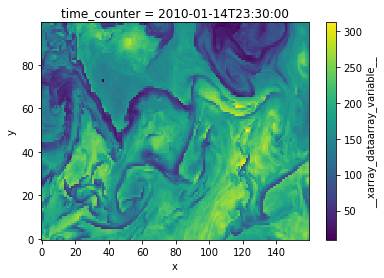

In [44]:
MLD_bar.sel(time_counter='2010-01-14').plot()

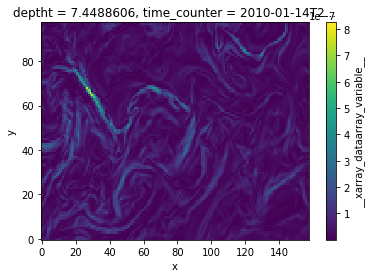

In [50]:
bfk_bar.sel(time_counter='2010-01-14')[0,5].plot()

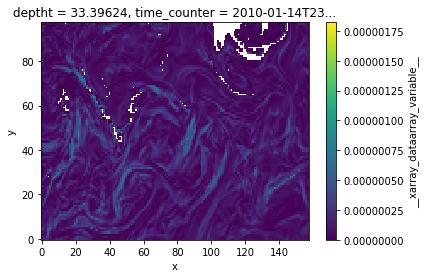

In [46]:
bfk_bar.sel(time_counter='2010-01-14')[0,15].plot()

/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)


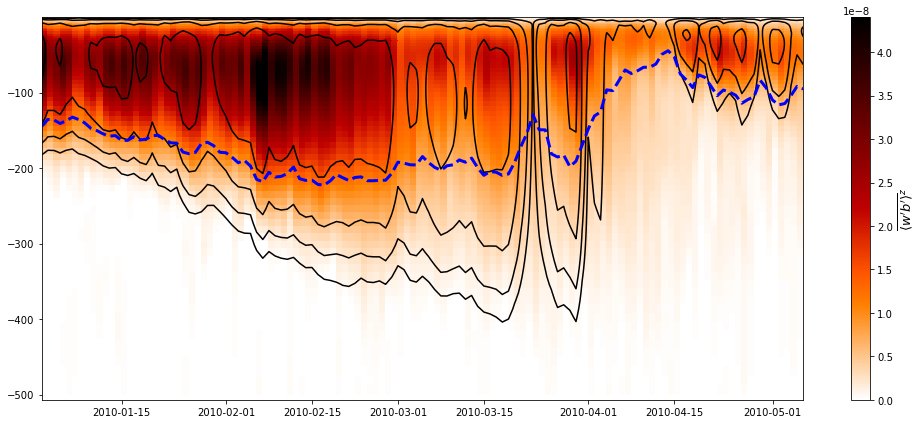

In [7]:
X,Y = np.meshgrid(bfk.time_counter, -bfk.deptht)

fig, ax = plt.subplots(figsize=(14,6))
fig.set_tight_layout(True)

im = ax.pcolormesh(wsbs.time_counter, -wsbs.depthw, 
                   wsbs.data.T, 
                   cmap='gist_heat_r', vmin=0., vmax=4.4e-8, rasterized=True)
cs = ax.contour(X, Y, bfk.data.T,
                colors='k', levels=np.logspace(-8,-5,10))
for c in cs.collections:
    c.set_rasterized(True)
ax.plot(MLD.time_counter, MLD.data, c='blue', lw=3, ls='--')

ax.set_xlabel(r"")
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r"$\overline{\langle w'b'\rangle}^z$", fontsize=13)
plt.savefig('/scratch/cnt0024/hmg2840/tuchida/Figs/wsbs-Z_GulfStream_2010-01-01_05-05.pdf')

/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/scratch/cnt0024/hmg2840/tuchida/condapack/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/scratch/cnt0024/hmg2840/tuchida/c

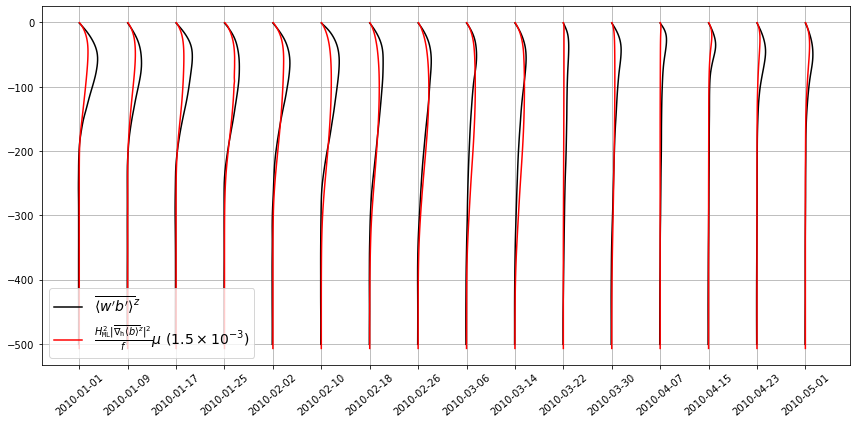

In [11]:
dskip = 8

fig, ax = plt.subplots(figsize=(12,6))
fig.set_tight_layout(True)

for i in range(len(wsbs.time_counter[::dskip])):
    if i == 0:
        ax.plot(wsbs[::dskip][i]-wsbs[::dskip][i,0]+1e-7*i, -wsbs.depthw, 'k', 
                label=r"$\overline{\langle w'b'\rangle}^z$")
        ax.plot(bfk[::dskip][i]*.15+1e-7*i, -bfk.deptht, 'r', 
                label=r"$\frac{H_{\tt ML}^2|\overline{\nabla_{\tt h}\langle b\rangle}^z|^2}{f}\mu\ (1.5\times 10^{-3})$")
    else:
        ax.plot(wsbs[::dskip][i]-wsbs[::dskip][i,0]+1e-7*i, -wsbs.depthw, 'k')
        ax.plot(bfk[::dskip][i]*.15+1e-7*i, -bfk.deptht, 'r')
# MLD.plot(ax=ax, c='grey', lw=3, ls='--')

ax.set_xticks(np.arange(0, len(wsbs.time_counter[::dskip])*1e-7, 1e-7))
ax.set_xticklabels(np.asarray(wsbs.time_counter[::dskip].data, dtype='datetime64[D]'), 
                   rotation=40)
ax.grid(True)
ax.legend(loc='lower left', fontsize=14)
plt.savefig('/scratch/cnt0024/hmg2840/tuchida/Figs/wsbs-lines_GulfStream_2010-01-01_05-05.pdf')

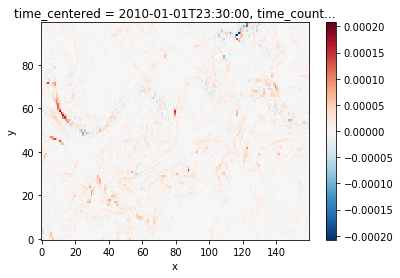

In [26]:
(wsbsb_bar*xr.DataArray(dsmask.e3w_1d[0,:len(wsbsb_bar.depthw)].data, dims='depthw')).sum('depthw')[0].plot()

In [38]:
iwsbs_75 = np.nanargmin(np.abs(xr.DataArray(np.nancumsum(wsbsb_bar*xr.DataArray(dsmask.e3w_1d[0,:len(wsbsb_bar.depthw)].data, 
                                                                               dims='depthw'), axis=1),
                                           dims=['time_counter','depthw','y','x'])
                               - (wsbsb_bar*xr.DataArray(dsmask.e3w_1d[0,:len(wsbsb_bar.depthw)].data, 
                                                         dims='depthw')).sum('depthw')*.75),
                       axis=1)
iBFK_75 = np.nanargmin(np.abs(xr.DataArray(np.nancumsum(bfk_bar*xr.DataArray(dsmask.e3t_1d[0,:len(bfk_bar.deptht)], 
                                                                             dims='deptht'), axis=1),
                                           dims=['time_counter','deptht','y','x'])
                              - xr.DataArray(np.nansum(bfk_bar*xr.DataArray(dsmask.e3t_1d[0,:len(bfk_bar.deptht)], 
                                                                            dims='deptht'), axis=1)*.75,
                                            dims=['time_counter','y','x'])), 
                    axis=1)
iBFK_75

array([[[23, 19, 20, ..., 36, 35, 34],
        [23, 19, 18, ..., 36, 36, 34],
        [22, 18, 19, ..., 35, 36, 35],
        ...,
        [12, 15, 14, ..., 29, 29, 29],
        [12, 15, 13, ..., 27, 30, 30],
        [14, 14, 11, ..., 26, 27, 28]],

       [[17, 22, 18, ..., 36, 36, 35],
        [21, 20, 16, ..., 36, 37, 35],
        [19, 16, 14, ..., 35, 35, 35],
        ...,
        [16, 13, 10, ..., 28, 29, 28],
        [13,  9, 15, ..., 23, 24, 28],
        [13,  9, 25, ..., 25, 25, 22]],

       [[18, 14, 13, ..., 37, 37, 28],
        [14, 13, 30, ..., 37, 36, 31],
        [14, 32, 32, ..., 36, 35, 35],
        ...,
        [10, 14, 17, ..., 20, 21, 24],
        [15, 25, 19, ..., 17, 20, 19],
        [27, 26, 25, ..., 24, 23, 21]],

       ...,

       [[ 7,  8,  8, ..., 24, 23, 18],
        [ 9,  9,  6, ..., 27, 25, 25],
        [10,  8,  6, ..., 27, 27, 27],
        ...,
        [ 5,  7,  8, ...,  6,  6,  8],
        [ 6,  8,  8, ...,  8,  8,  8],
        [ 7,  8,  8, ...,  8,  8

In [39]:
zwsbs_75 = (xr.ones_like(wsbsb_bar)*wsbsb_bar.depthw)[{'depthw':xr.DataArray(iwsbs_75, dims=['time_counter','y','x'])}]
zBFK_75 = (xr.ones_like(bfk_bar)*bfk_bar.deptht)[{'deptht':xr.DataArray(iBFK_75, dims=['time_counter','y','x'])}]
zBFK_75

<xarray.DataArray (time_counter: 125, y: 98, x: 158)>
dask.array<reshape, shape=(125, 98, 158), dtype=float64, chunksize=(125, 98, 158), chunktype=numpy.ndarray>
Coordinates:
    nav_lon       (y, x) float32 dask.array<chunksize=(98, 158), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(98, 158), meta=np.ndarray>
    deptht        (time_counter, y, x) float64 65.92 48.34 52.48 ... 44.36 44.36
  * time_counter  (time_counter) datetime64[ns] 2010-01-01T23:30:00 ... 2010-05-05T23:30:00
Dimensions without coordinates: y, x

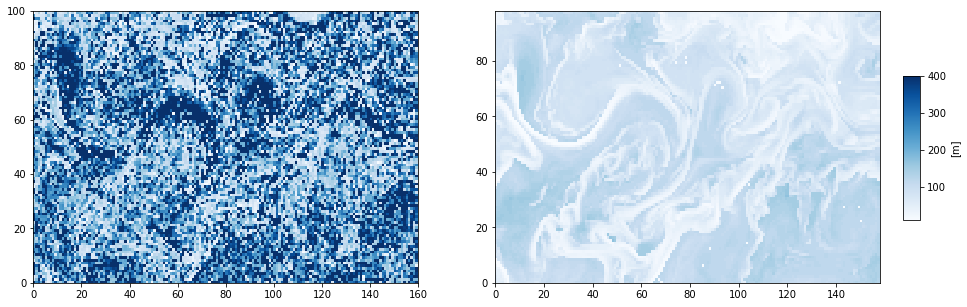

In [40]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

im = ax1.pcolormesh(zwsbs_75[0], vmin=10, vmax=4e2, cmap='Blues')
ax2.pcolormesh(zBFK_75[0], vmin=10, vmax=4e2, cmap='Blues')

fig.subplots_adjust(right=0.86)
cbaxes = fig.add_axes([0.88, 0.3, 0.015, 0.4]) 
cbar = fig.colorbar(im, orientation='vertical', cax=cbaxes)
cbar.set_label(r"[m]")

In [47]:
zwsbs = ((zwsbs_75*Atb).sel(y=slice(1,-1),x=slice(1,-1)).sum(dim=['y','x']) 
        * Atb.sel(y=slice(1,-1),x=slice(1,-1)).sum(dim=['y','x'])**-1
        )
zBFK = ((zBFK_75*Atb.sel(y=slice(1,-1),x=slice(1,-1))).sum(dim=['y','x']) 
        * Atb.sel(y=slice(1,-1),x=slice(1,-1)).sum(dim=['y','x'])**-1
       )
MLD = (((MLD_bar*Atb).sel(y=slice(1,-1),x=slice(1,-1))).sum(dim=['y','x']) 
        * Atb.sel(y=slice(1,-1),x=slice(1,-1)).sum(dim=['y','x'])**-1
       )
zBFK

<xarray.DataArray (time_counter: 125)>
dask.array<mul, shape=(125,), dtype=float64, chunksize=(125,), chunktype=numpy.ndarray>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2010-01-01T23:30:00 ... 2010-05-05T23:30:00

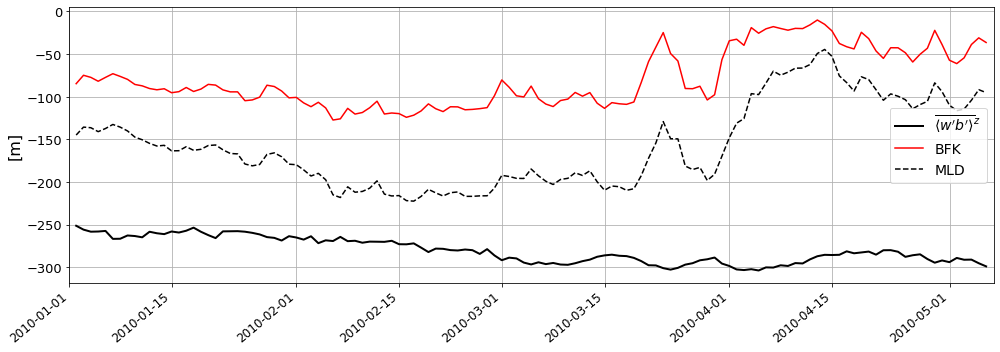

In [50]:
fig, ax1 = plt.subplots(figsize=(14,5))
fig.set_tight_layout(True)


(-zwsbs).sel(time_counter=slice(None,None)).plot(ax=ax1, color='k', lw=2,
                                                label=r"$\overline{\langle w'b'\rangle}^z$")
(-zBFK).sel(time_counter=slice(None,None)).plot(ax=ax1, color='r',
                                               label=r"BFK")
(-MLD).sel(time_counter=slice(None,None)).plot(ax=ax1, color='k', ls='--',
                                               label=r"MLD")


ax1.set_ylabel(r"[m]", fontsize=16)
# ax2.set_ylabel(r"$\overline{\langle w'\theta'\rangle}^z, \overline{\langle w's'\rangle}^z$ [m$^2$ s$^{-3}$]", fontsize=16)
ax1.set_xlabel(r"")


ax1.set_xlim(['2010-01-01','2010-05-07'])
# ax1.set_xticklabels([])
ax1.tick_params(axis='x', labelsize=12, labelrotation=40)
ax1.tick_params(axis='y', labelsize=13)
# ax2.spines['right'].set_color('k')
# ax2.tick_params(axis='y', colors='k', labelsize=13)

ax1.legend(loc='center right', fontsize=14)
# ax2.legend(loc='upper right', fontsize=14)
ax1.grid(True)


plt.savefig('/scratch/cnt0024/hmg2840/tuchida/Figs/zwsbs_GulfStream_2010-01-01_2010-05-05.pdf')